In [57]:
import numpy as np
import matplotlib.pyplot as plt

In [58]:
Zs = np.loadtxt('../../qm7/Z.txt', delimiter=',', dtype=int)
Es = np.loadtxt('../../qm7/E.txt', delimiter=',', dtype=float)
Rs = np.loadtxt('../../qm7/R.txt', delimiter=',', dtype=float)

In [59]:
def getElement(index:int = 1) -> str:    
    elements="H   He\
        Li  Be  B   C   N   O   F   Ne\
        Na  Mg  Al  Si  P   S   Cl  Ar\
        K   Ca  Sc  Ti  V   Cr  Mn  Fe  Co  Ni  Cu  Zn  Ga  Ge  As  Se  Br  Kr\
        Rb  Sr  Y   Zr  Nb  Mo  Tc  Ru  Rh  Pd  Ag  Cd  In  Sn  Sb  Te  I   Xe\
        Cs  Ba  La  Ce  Pr  Nd  Pm  Sm  Eu  Gd  Tb  Dy  Ho  Er  Tm  Yb\
        Lu  Hf  Ta  W   Re  Os  Ir  Pt  Au  Hg  Tl  Pb  Bi  Po  At  Rn\
        Fr  Ra  Ac  Th  Pa  U".split()    
    
    return elements[index-1]

In [60]:
heavy_atoms = [6, 7, 8, 16] # C, N, O, S

small_mols = 0
small_index = []
for i in range(len(Zs)):
    n_heavy = 0

    for j in Zs[i]:
        if (j == 0): break
        if (j in heavy_atoms):
            n_heavy += 1
    
    if (n_heavy in [3, 4, 5]):
        small_mols += 1
        small_index.append(i)

print(small_mols)

small_index = np.array(small_index)

213


In [61]:
smallZs = Zs[small_index]
smallEs = Es[small_index]
smallRs = Rs[small_index]

notSmallZs = np.delete(Zs, small_index, axis=0)
notSmallEs = np.delete(Es, small_index, axis=0)
notSmallRs = np.delete(Rs, small_index, axis=0)

In [62]:
N_small = np.shape(smallZs)[0]

QM7 = open("sorted/qm7_small.txt", "w")
QM7.write(f"QM7 Database of {N_small} Organic Molecules with 1-6 heavy atoms in XYZ format\n\n")

for i in range(N_small):
    nAtoms = np.count_nonzero(smallZs[i])
    QM7.write(f"{nAtoms}\n\n")
    
    for j in range(nAtoms):
        QM7.write(f"{getElement(smallZs[i][j])}" + " "*10)
        QM7.write(f"{smallRs[i][j+0]:.5f}" + " "*8)
        QM7.write(f"{smallRs[i][j+1]:.5f}" + " "*8)
        QM7.write(f"{smallRs[i][j+2]:.5f}" + " "*8)
        QM7.write("\n")

    QM7.write("\n")
QM7.close()

E = open("sorted/PBE0_small.txt", "w")
for i in range(N_small):
    E.write(f"{smallEs[i]:.2f}\n")

E.close()

In [63]:
N_notSmall = np.shape(notSmallZs)[0]

QM7 = open("sorted/qm7_rest.txt", "w")
QM7.write(f"QM7 Database of {N_notSmall} Organic Molecules that do not contain 1-6 heavy atoms XYZ format.\n\n")

for i in range(N_notSmall):
    nAtoms = np.count_nonzero(notSmallZs[i])
    QM7.write(f"{nAtoms}\n\n")
    
    for j in range(nAtoms):
        QM7.write(f"{getElement(notSmallZs[i][j])}" + " "*10)
        QM7.write(f"{notSmallRs[i][j+0]:.5f}" + " "*8)
        QM7.write(f"{notSmallRs[i][j+1]:.5f}" + " "*8)
        QM7.write(f"{notSmallRs[i][j+2]:.5f}" + " "*8)
        QM7.write("\n")

    QM7.write("\n")
QM7.close()

E = open("sorted/PBE0_rest.txt", "w")
for i in range(N_notSmall):
    E.write(f"{notSmallEs[i]:.2f}\n")

E.close()

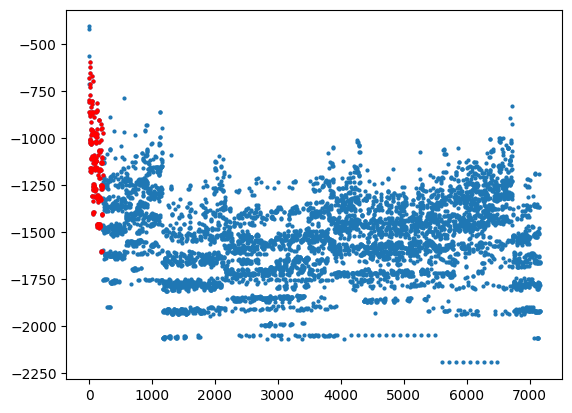

In [64]:
plt.scatter([i for i in range(len(Zs))],
            Es,
            s = 4)

plt.scatter(small_index, smallEs,
            color="red",
            s = 4,
            zorder=10)
plt.show()